## Employee Attrition Prediction

In [1]:
# Importing the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
# To display all columns in the dataframe

pd.set_option('display.max_columns', None)

In [9]:
# Setting the plot configuration

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13) 

### Read and Understand the data

In [10]:
# Function to read the data and return it as a dataframe
FOLDER_NAME = 'dataset'
FILE_NAME = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

def read_data(folder_name=FOLDER_NAME, file_name=FILE_NAME):
    return pd.read_csv(os.path.join(folder_name, file_name))

In [11]:
# Reading the data using the above function
df = read_data()

df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [12]:
# Looking at the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
# There are 1470 rows and 35 features out of which 26 are numeric and 9 are categorical.
# Looks like there aren't any missing values in the dataset.
# The target variable is 'Attrition' which is categorical with two values (binary) Yes/No
# This data is of 1470 employees

In [14]:
# Looking at the summary of numeric variables

df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

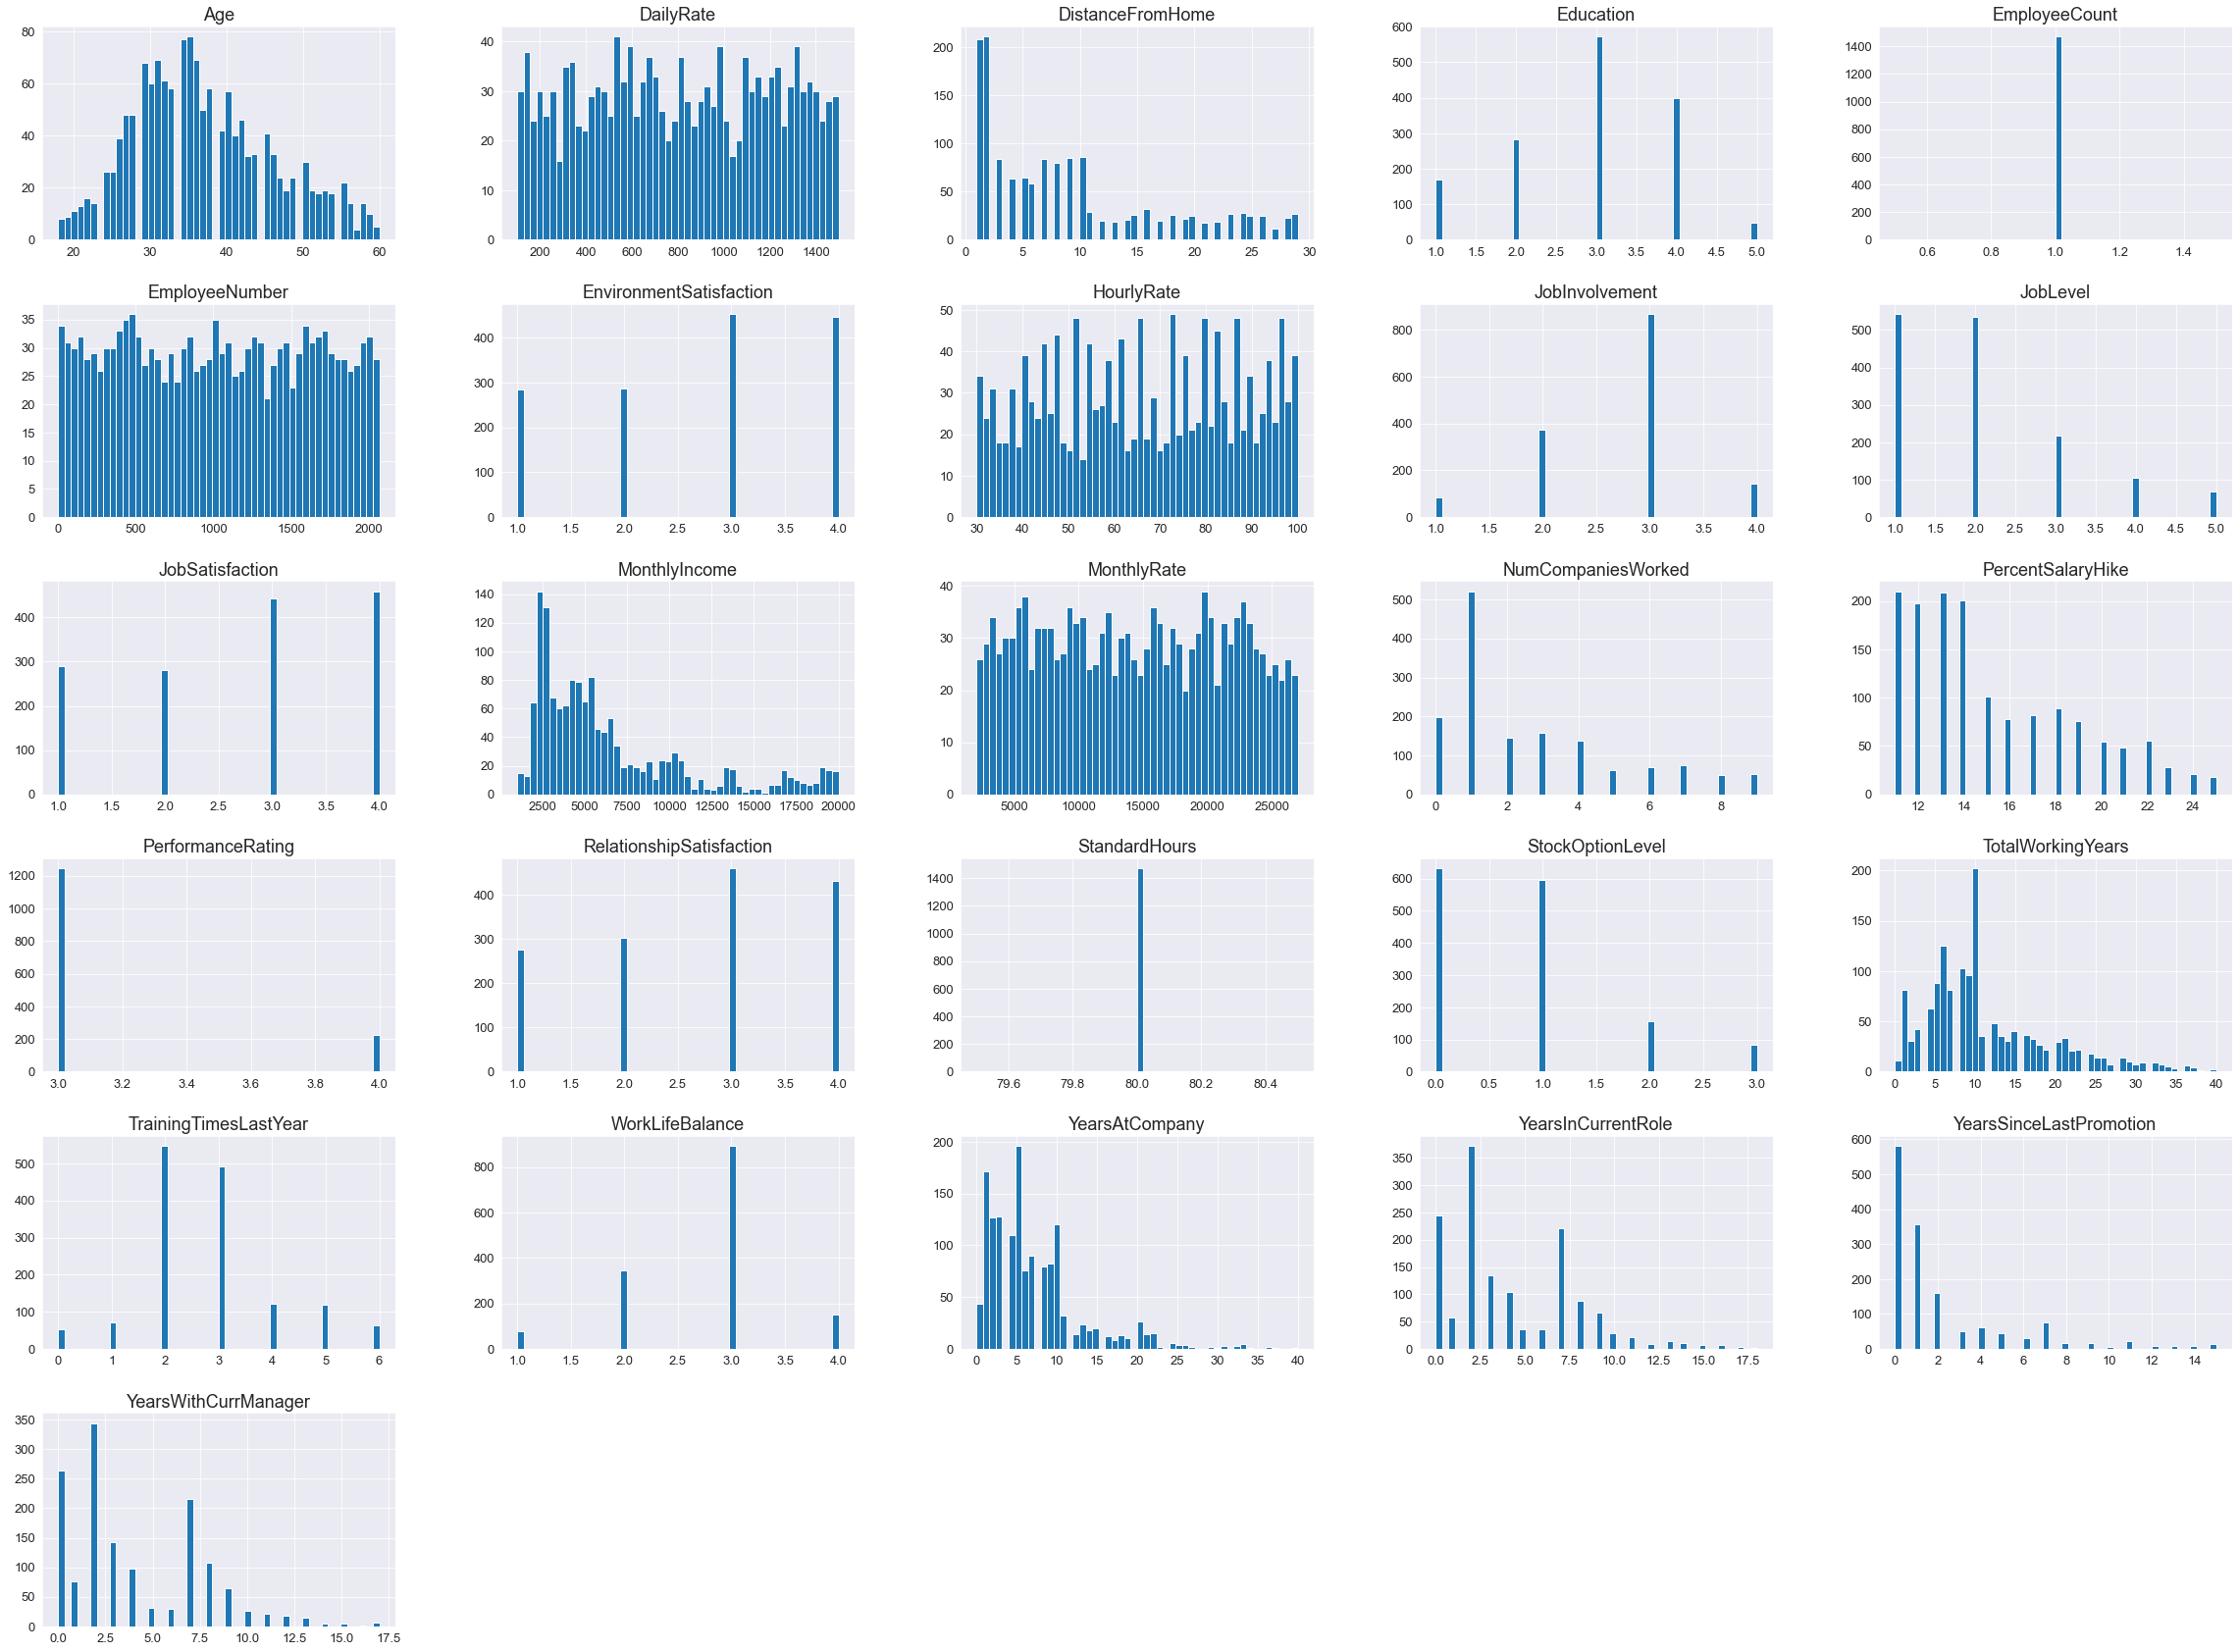

In [15]:
# Plotting the histogram of numeric variables

df.hist(bins=50, figsize=(40, 30))
plt.show()

### Train Test Split

In [16]:
# Train-Test Split
# Splitting into train and test sets now itself to avoid the data snooping bias
# We have to do stratified sampling on the target variable to retain the same pecentage of samples in both train and test sets

from sklearn.model_selection import train_test_split

def split_train_test(dataset, target_variable, test_ratio):
    train_set, test_set = train_test_split(dataset, test_size=test_ratio, stratify=dataset[target_variable])
    return train_set, test_set

In [17]:
df_train, df_test = split_train_test(df, 'Attrition', 0.2)

In [18]:
df_train['Attrition'].value_counts() / len(df_train)

No     0.838435
Yes    0.161565
Name: Attrition, dtype: float64

In [19]:
df_test['Attrition'].value_counts() / len(df_test)

No     0.840136
Yes    0.159864
Name: Attrition, dtype: float64

In [20]:
# We have the same percentage of values in both train and test sets for target variable 'Attrition'

In [21]:
# From now on we do all the operations/analysis and other stuffs only on the train set and set aside test set until evaluation

### Exploratory Data Analysis

In [22]:
# Writing a function to select all the categorical variables and print the number of categories in it

def get_num_categories(dataset):
    cat_vars = list(dataset.select_dtypes('object').columns)
    data = []
    for var in cat_vars:
        num_cats = len(dataset[var].value_counts())
        data.append((var, num_cats))
    return data

In [23]:
num_categories = get_num_categories(df_train)

num_categories

[('Attrition', 2),
 ('BusinessTravel', 3),
 ('Department', 3),
 ('EducationField', 6),
 ('Gender', 2),
 ('JobRole', 9),
 ('MaritalStatus', 3),
 ('Over18', 1),
 ('OverTime', 2)]

In [24]:
# Let's first see the number of categories in each categorical variable

# Business Travel
df_train['BusinessTravel'].value_counts()

Travel_Rarely        836
Travel_Frequently    218
Non-Travel           122
Name: BusinessTravel, dtype: int64

In [25]:
# Department
# Let's look at the number of departments that are available

df_train['Department'].value_counts()

Research & Development    777
Sales                     355
Human Resources            44
Name: Department, dtype: int64

In [26]:
# Education Field
# Let's look at the various education fields of various employees

df_train['EducationField'].value_counts()

Life Sciences       480
Medical             379
Marketing           126
Technical Degree    109
Other                65
Human Resources      17
Name: EducationField, dtype: int64

In [27]:
# Gender

df_train['Gender'].value_counts()

Male      710
Female    466
Name: Gender, dtype: int64

In [28]:
# Job Role
# Looking at the various job roles

df_train['JobRole'].value_counts()

Sales Executive              252
Research Scientist           234
Laboratory Technician        210
Manufacturing Director       119
Healthcare Representative    109
Manager                       79
Sales Representative          71
Research Director             65
Human Resources               37
Name: JobRole, dtype: int64

In [29]:
# Marital Status

df_train['MaritalStatus'].value_counts()

Married     535
Single      375
Divorced    266
Name: MaritalStatus, dtype: int64

In [30]:
# Over18

df_train['Over18'].value_counts()

Y    1176
Name: Over18, dtype: int64

In [31]:
# There is only one category in this variable, this can be dropped in data peparation stage

In [32]:
# OverTime

df_train['OverTime'].value_counts()

No     826
Yes    350
Name: OverTime, dtype: int64

In [33]:
# Let's encode the target variable just for analysis purpose for now
# 0=No, 1=Yes

from sklearn.preprocessing import LabelEncoder

# Creating the snapsht of train set for analysis
data = df_train.copy()

le = LabelEncoder()

data['Attrition'] = le.fit_transform(data['Attrition'])

In [34]:
data['Attrition'].value_counts()

0    986
1    190
Name: Attrition, dtype: int64

In [35]:
# Age vs Attrition
# Let's see what age group has highest attrition

data.groupby(by='Age')['Attrition'].mean().sort_values(ascending=False)

Age
20    0.666667
19    0.625000
18    0.571429
21    0.500000
23    0.333333
58    0.333333
31    0.301887
28    0.295455
29    0.290909
26    0.290323
25    0.285714
24    0.238095
22    0.214286
33    0.200000
39    0.187500
44    0.185185
41    0.185185
56    0.166667
51    0.166667
50    0.160000
37    0.150000
55    0.142857
47    0.136364
52    0.133333
32    0.130435
34    0.117647
30    0.116279
46    0.111111
35    0.107692
48    0.100000
49    0.100000
36    0.089286
40    0.088889
27    0.047619
43    0.045455
38    0.040000
45    0.030303
42    0.028571
54    0.000000
53    0.000000
57    0.000000
59    0.000000
60    0.000000
Name: Attrition, dtype: float64

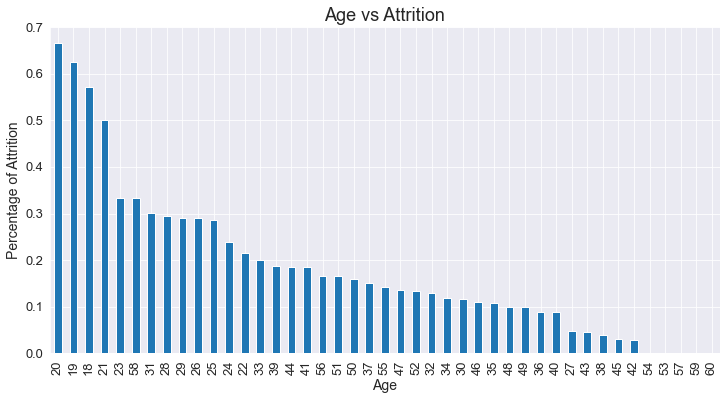

In [36]:
# Plotting the above

data.groupby(by='Age')['Attrition'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.xlabel('Age')
plt.ylabel('Percentage of Attrition')
plt.title('Age vs Attrition')
plt.show()

In [37]:
# The percentage of attrition is high among young graduates age between 19 to 21

In [38]:
# BusinessTravel vs Attrition

data.groupby(by='BusinessTravel')['Attrition'].mean().sort_values(ascending=False)

BusinessTravel
Travel_Frequently    0.247706
Travel_Rarely        0.149522
Non-Travel           0.090164
Name: Attrition, dtype: float64

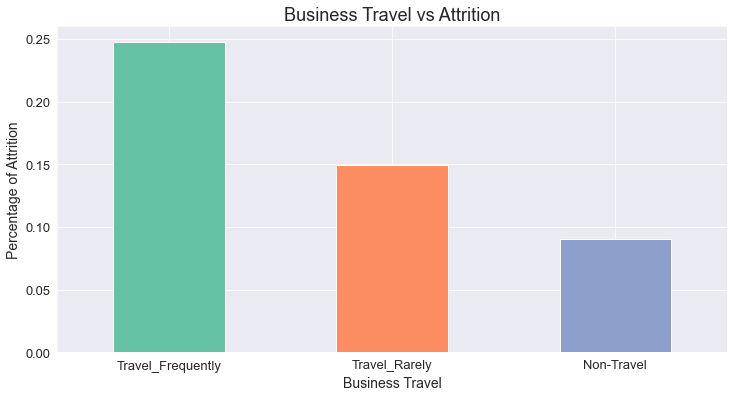

In [39]:
# Plot

data.groupby(by='BusinessTravel')['Attrition'].mean().sort_values(ascending=False).plot(kind='bar', color=sns.color_palette('Set2'), figsize=(12,6))
plt.xlabel('Business Travel')
plt.ylabel('Percentage of Attrition')
plt.title('Business Travel vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [40]:
# The attrition percentage is high among the employees who travel frequently

In [41]:
# Daily Rate vs Attrition

In [42]:
data['DailyRate'].describe()

count    1176.000000
mean      805.595238
std       403.623943
min       103.000000
25%       465.750000
50%       805.000000
75%      1162.000000
max      1499.000000
Name: DailyRate, dtype: float64

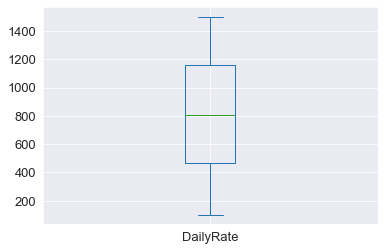

In [43]:
data['DailyRate'].plot(kind='box')
plt.show()

In [44]:
# Daily Rate is a numeric variable/continuous so we have to categorize those values by binning for analysis purpose
data['DailyRate_cat'] = pd.cut(x=data['DailyRate'],
                               bins=[0, 400, 800, 1200, np.inf],
                               labels=['<400', '400-800', '800-1200', '>1200'])

In [45]:
data['DailyRate_cat'].value_counts()

400-800     344
800-1200    335
>1200       259
<400        238
Name: DailyRate_cat, dtype: int64

In [46]:
data.groupby(by='DailyRate_cat')['Attrition'].mean()

DailyRate_cat
<400        0.214286
400-800     0.159884
800-1200    0.143284
>1200       0.138996
Name: Attrition, dtype: float64

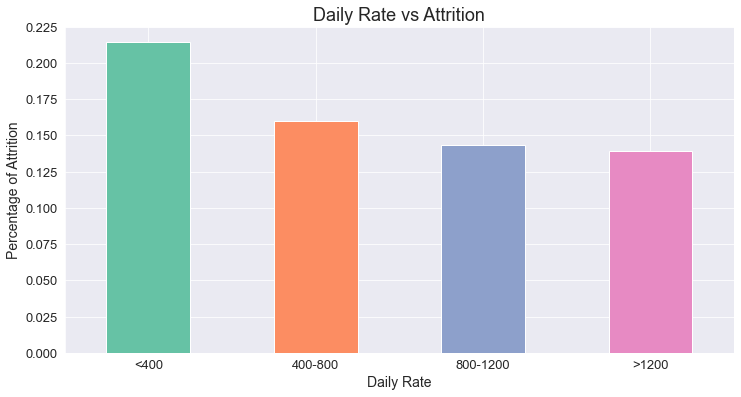

In [47]:
data.groupby(by='DailyRate_cat')['Attrition'].mean().plot(kind='bar', color=sns.color_palette('Set2'), figsize=(12,6))
plt.xlabel('Daily Rate')
plt.ylabel('Percentage of Attrition')
plt.title('Daily Rate vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [48]:
# Employees with low DailyRates have highest percentage of attrition

In [49]:
# Department vs Attrition

data.groupby(by='Department')['Attrition'].mean()

Department
Human Resources           0.227273
Research & Development    0.136422
Sales                     0.208451
Name: Attrition, dtype: float64

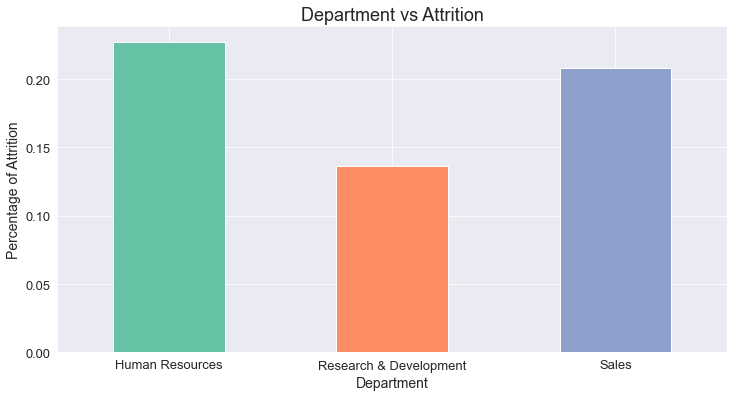

In [50]:
# Plot

data.groupby(by='Department')['Attrition'].mean().plot(kind='bar', color=sns.color_palette('Set2'), figsize=(12,6))
plt.xlabel('Department')
plt.ylabel('Percentage of Attrition')
plt.title('Department vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [51]:
# Sales department has highest attrition rate

In [52]:
# Distance From Home vs Attrition

data['DistanceFromHome'].describe()

count    1176.000000
mean        9.159864
std         8.089917
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

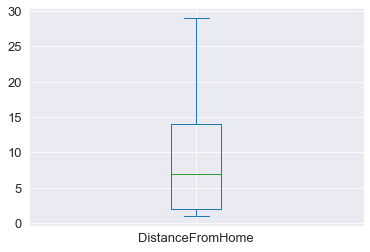

In [53]:
data['DistanceFromHome'].plot(kind='box')
plt.show()

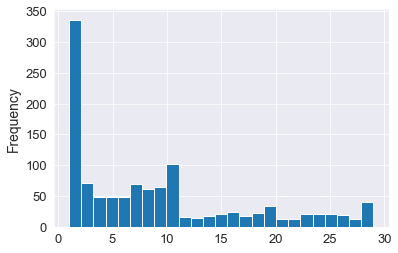

In [54]:
data['DistanceFromHome'].plot(kind='hist', bins=25)
plt.show()

In [55]:
# The values are skewed this should be handled using Scaling

In [56]:
# DistanceFromHome is a numeric variable/continuous so we have to categorize those values by binning for analysis purpose

data['DistanceFromHome_cat'] = pd.cut(x=data['DistanceFromHome'],
                                      bins=[0, 2, 5, 10, 15, 20, np.inf],
                                      labels=['<2', '2-5', '5-10', '10-15', '15-20', '>20'])

In [57]:
data['DistanceFromHome_cat'].value_counts()

<2       336
5-10     318
2-5      168
>20      160
15-20     98
10-15     96
Name: DistanceFromHome_cat, dtype: int64

In [58]:
data.groupby(by='DistanceFromHome_cat')['Attrition'].mean().sort_values(ascending=False)

DistanceFromHome_cat
>20      0.231250
10-15    0.208333
15-20    0.173469
2-5      0.166667
5-10     0.144654
<2       0.125000
Name: Attrition, dtype: float64

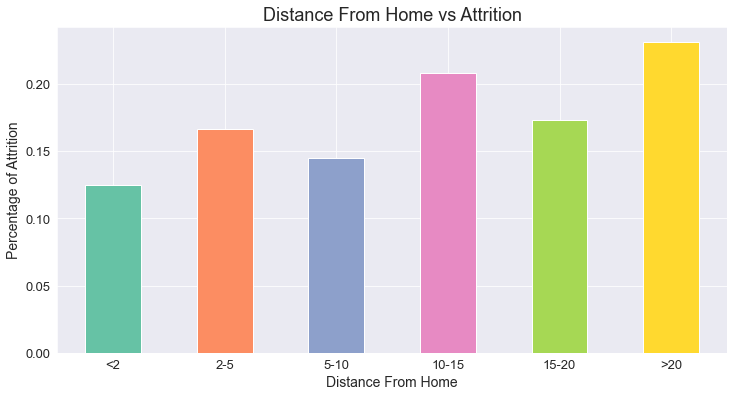

In [59]:
data.groupby(by='DistanceFromHome_cat')['Attrition'].mean().plot(kind='bar', color=sns.color_palette('Set2'), figsize=(12,6))
plt.xlabel('Distance From Home')
plt.ylabel('Percentage of Attrition')
plt.title('Distance From Home vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [60]:
# More the distance from home higher is the attrition rate

In [61]:
# Education vs Attrition

data['Education'].value_counts()

3    457
4    319
2    226
1    137
5     37
Name: Education, dtype: int64

In [62]:
data.groupby(by='Education')['Attrition'].mean().sort_values(ascending=False)

Education
3    0.179431
1    0.167883
2    0.154867
4    0.144201
5    0.108108
Name: Attrition, dtype: float64

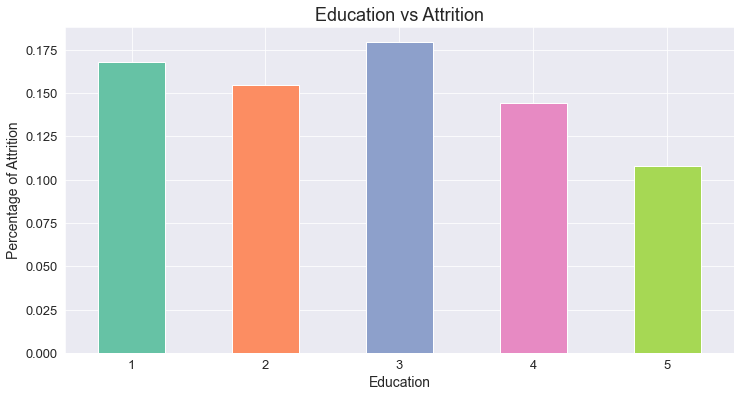

In [63]:
data.groupby(by='Education')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.xlabel('Education')
plt.ylabel('Percentage of Attrition')
plt.title('Education vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [64]:
# Employees with lower education level have high attrition rate when compared with employees with high education level

In [65]:
# Education Field vs Attrition

data.groupby(by='EducationField')['Attrition'].mean().sort_values(ascending=False)

EducationField
Human Resources     0.352941
Technical Degree    0.229358
Marketing           0.222222
Medical             0.145119
Life Sciences       0.139583
Other               0.138462
Name: Attrition, dtype: float64

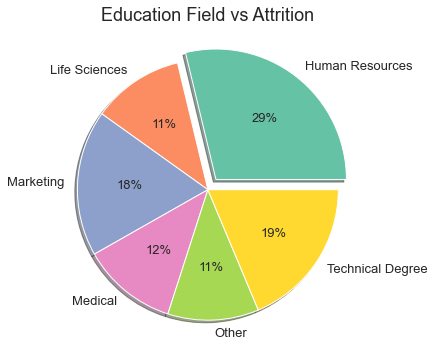

In [66]:
explode_list = [0.1, 0, 0, 0, 0, 0]
data.groupby(by='EducationField')['Attrition'].mean().plot(kind='pie', figsize=(12,6), colors=sns.color_palette('Set2'), autopct='%.0f%%', explode=explode_list , shadow=True)
plt.ylabel(None)
plt.title('Education Field vs Attrition')
plt.show()

In [67]:
# Employees with HR degree have the highest attrition rate followed by the ones with Technical degree

In [68]:
# EmployeeCount

data['EmployeeCount'].value_counts()

1    1176
Name: EmployeeCount, dtype: int64

In [69]:
# There is only one value in this variable, no variance. This should be dropped 

In [70]:
# EmployeeNumber

data['EmployeeNumber'].describe()

count    1176.000000
mean     1015.932823
std       598.769547
min         2.000000
25%       486.250000
50%      1016.500000
75%      1530.000000
max      2068.000000
Name: EmployeeNumber, dtype: float64

In [71]:
# This is Employee ID which is unique for each employee. Does not add any value for analysis, even this should be dropped.

In [72]:
# Environment Satisfaction vs Attrition

data.groupby(by='EnvironmentSatisfaction')['Attrition'].mean()

EnvironmentSatisfaction
1    0.250000
2    0.155556
3    0.139344
4    0.132964
Name: Attrition, dtype: float64

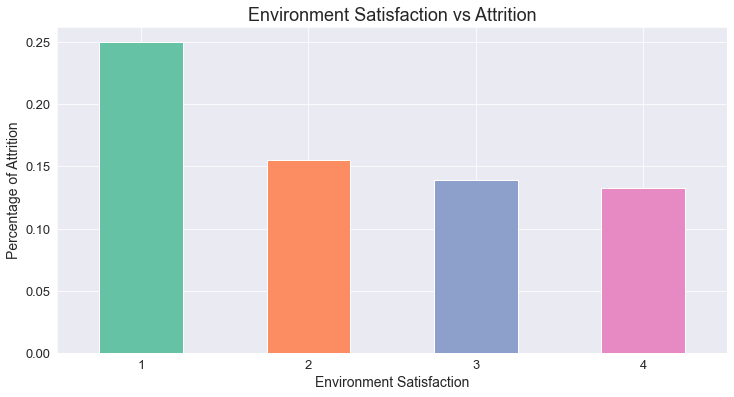

In [73]:
data.groupby(by='EnvironmentSatisfaction')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.xlabel('Environment Satisfaction')
plt.ylabel('Percentage of Attrition')
plt.title('Environment Satisfaction vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [74]:
# Lower the environemnt satisfaction higher the attrition rate

In [75]:
# Gender vs Attrition

data.groupby(by='Gender')['Attrition'].mean()

Gender
Female    0.148069
Male      0.170423
Name: Attrition, dtype: float64

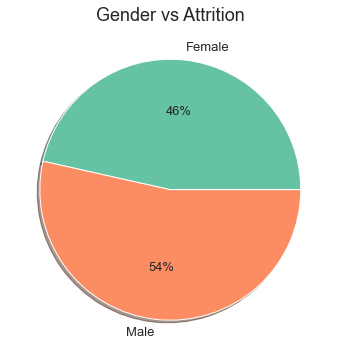

In [76]:
data.groupby(by='Gender')['Attrition'].mean().plot(kind='pie', figsize=(12,6), colors=sns.color_palette('Set2'), autopct='%.0f%%', shadow=True)
plt.ylabel(None)
plt.title('Gender vs Attrition')
plt.show()

In [77]:
# Both the Genders almost have close attrition rate to be more specific Male's are little on the higher side by 6% than females

In [78]:
# HourlyRate vs Attrition

data['HourlyRate'].describe()

count    1176.000000
mean       65.671769
std        20.035953
min        30.000000
25%        48.000000
50%        65.000000
75%        83.000000
max       100.000000
Name: HourlyRate, dtype: float64

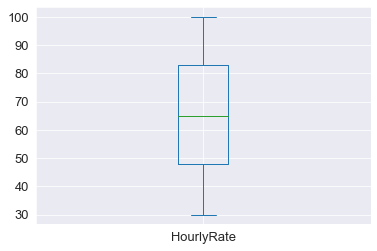

In [79]:
data['HourlyRate'].plot(kind='box')
plt.show()

In [80]:
# HourlyRate is a continuous variable so let's bin those values into some categories for analysis

data['HourlyRate_cat'] = pd.cut(x=data['HourlyRate'],
                                bins=[0, 40, 60, 80, np.inf],
                                labels=['<40', '40-60', '60-80', '>80'])

data['HourlyRate_cat'].value_counts()

40-60    364
>80      338
60-80    330
<40      144
Name: HourlyRate_cat, dtype: int64

In [81]:
data.groupby(by='HourlyRate_cat')['Attrition'].mean()

HourlyRate_cat
<40      0.187500
40-60    0.159341
60-80    0.154545
>80      0.159763
Name: Attrition, dtype: float64

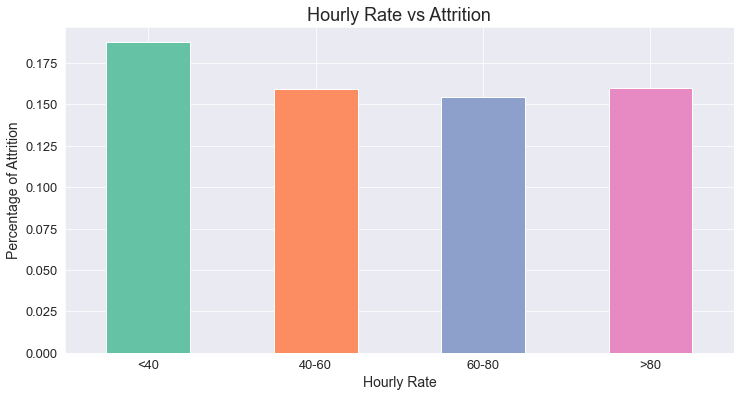

In [82]:
data.groupby(by='HourlyRate_cat')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.xlabel('Hourly Rate')
plt.ylabel('Percentage of Attrition')
plt.title('Hourly Rate vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [83]:
# Hourly Rate doesn't have much impact on Attrition rate

In [84]:
# JobInvolvement vs Attrition

data['JobInvolvement'].value_counts()

3    694
2    299
4    112
1     71
Name: JobInvolvement, dtype: int64

In [85]:
data.groupby(by='JobInvolvement')['Attrition'].mean()

JobInvolvement
1    0.323944
2    0.204013
3    0.136888
4    0.098214
Name: Attrition, dtype: float64

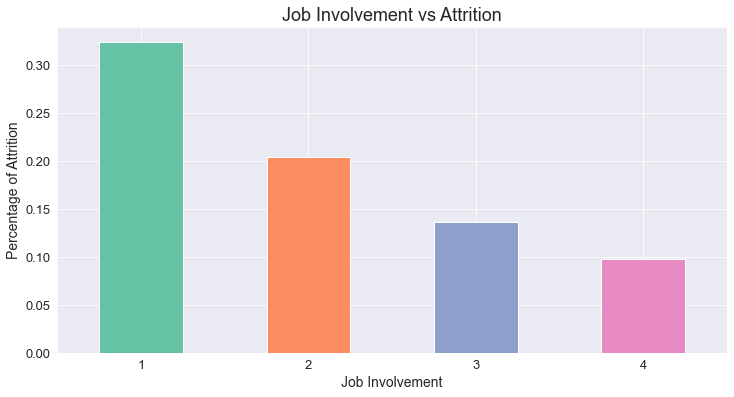

In [86]:
data.groupby(by='JobInvolvement')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.xlabel('Job Involvement')
plt.ylabel('Percentage of Attrition')
plt.title('Job Involvement vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [87]:
# Lesser the job involvement higher is the attrition rate

In [88]:
# JobLevel vs Attrition

data.groupby(by='JobLevel')['Attrition'].mean()

JobLevel
1    0.266055
2    0.087470
3    0.159091
4    0.047619
5    0.087719
Name: Attrition, dtype: float64

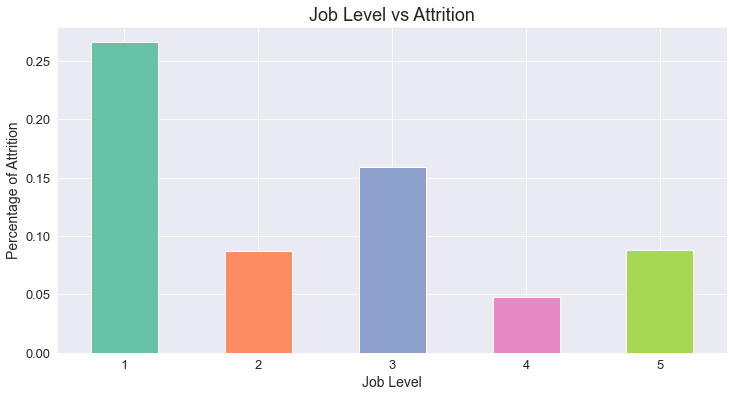

In [89]:
data.groupby(by='JobLevel')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.xlabel('Job Level')
plt.ylabel('Percentage of Attrition')
plt.title('Job Level vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [90]:
# Job Level 1 and Job Level 3 have high attrition rates

In [91]:
# JobRole vs Attrition

data['JobRole'].value_counts()

Sales Executive              252
Research Scientist           234
Laboratory Technician        210
Manufacturing Director       119
Healthcare Representative    109
Manager                       79
Sales Representative          71
Research Director             65
Human Resources               37
Name: JobRole, dtype: int64

In [92]:
data.groupby(by='JobRole')['Attrition'].mean().sort_values(ascending=False)

JobRole
Sales Representative         0.422535
Human Resources              0.270270
Laboratory Technician        0.238095
Sales Executive              0.166667
Research Scientist           0.145299
Healthcare Representative    0.082569
Manufacturing Director       0.067227
Manager                      0.063291
Research Director            0.030769
Name: Attrition, dtype: float64

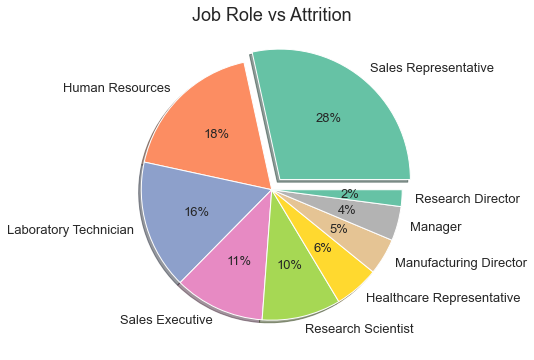

In [93]:
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0]
data.groupby(by='JobRole')['Attrition'].mean().sort_values(ascending=False).plot(kind='pie', figsize=(12,6), colors=sns.color_palette('Set2'), autopct='%.0f%%', explode=explode_list , shadow=True)
plt.ylabel(None)
plt.title('Job Role vs Attrition')
plt.show()

In [94]:
# JobSatisfaction vs Attrition

data.groupby(by='JobSatisfaction')['Attrition'].mean().sort_values(ascending=False)

JobSatisfaction
1    0.228070
2    0.181416
3    0.175141
4    0.095109
Name: Attrition, dtype: float64

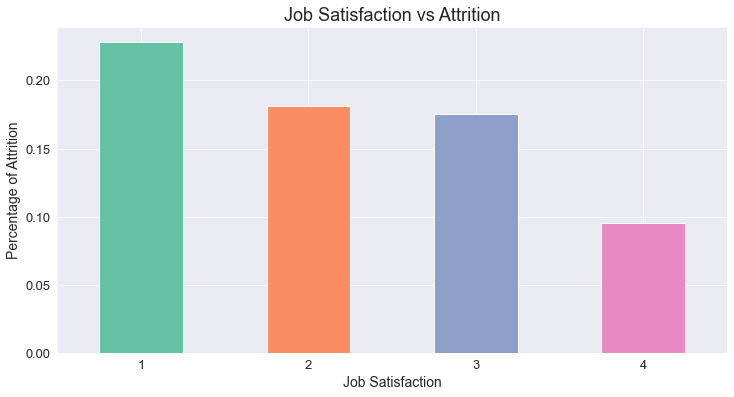

In [95]:
data.groupby(by='JobSatisfaction')['Attrition'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.xlabel('Job Satisfaction')
plt.ylabel('Percentage of Attrition')
plt.title('Job Satisfaction vs Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [96]:
# Lower the Job Satisfaction higher the Attrition rate

In [97]:
# Marital Status vs Attrition

data.groupby(by='MaritalStatus')['Attrition'].mean().sort_values(ascending=False)

MaritalStatus
Single      0.253333
Married     0.132710
Divorced    0.090226
Name: Attrition, dtype: float64

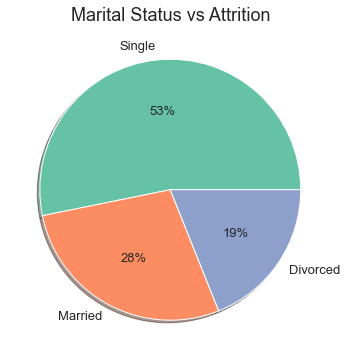

In [98]:
data.groupby(by='MaritalStatus')['Attrition'].mean().sort_values(ascending=False).plot(kind='pie', figsize=(12,6), colors=sns.color_palette('Set2'), autopct='%.0f%%', shadow=True)
plt.ylabel(None)
plt.title('Marital Status vs Attrition')
plt.show()

In [99]:
# Singles have high attrition rate

In [100]:
# Marital Status vs Job Involvement

data.groupby(by='MaritalStatus')['JobInvolvement'].mean()

MaritalStatus
Divorced    2.740602
Married     2.743925
Single      2.672000
Name: JobInvolvement, dtype: float64

In [334]:
# MonthlyIncome vs Attrition

data['MonthlyIncome'].describe()

count     1176.000000
mean      6545.236395
std       4735.634666
min       1009.000000
25%       2936.000000
50%       4936.000000
75%       8408.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

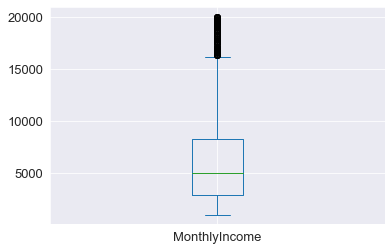

In [104]:
data['MonthlyIncome'].plot(kind='box')
plt.show()

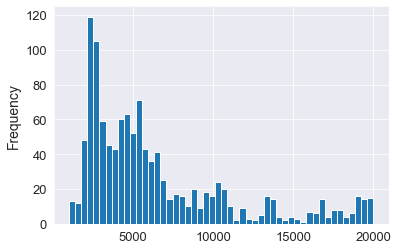

In [108]:
data['MonthlyIncome'].plot(kind='hist', bins=50)
plt.show()

In [110]:
# The data in this variable are skewed (right skewed) i.e there are outliers. This has to be handled while data peparation

In [112]:
# MonthlyIncome is a continuous variable so let's categorize it just for analysis purpose

data['MonthlyIncome_cat'] = pd.cut(data['MonthlyIncome'],
                                   bins=[0, 2500, 5000, 7500, 10000, np.inf],
                                   labels=['<2500', '2500-5000', '5000-7500', '7500-10000', '>10000'])

In [113]:
data.groupby(by='MonthlyIncome_cat')['Attrition'].mean()

MonthlyIncome_cat
<2500         0.364130
2500-5000     0.153285
5000-7500     0.094118
7500-10000    0.147059
>10000        0.093750
Name: Attrition, dtype: float64

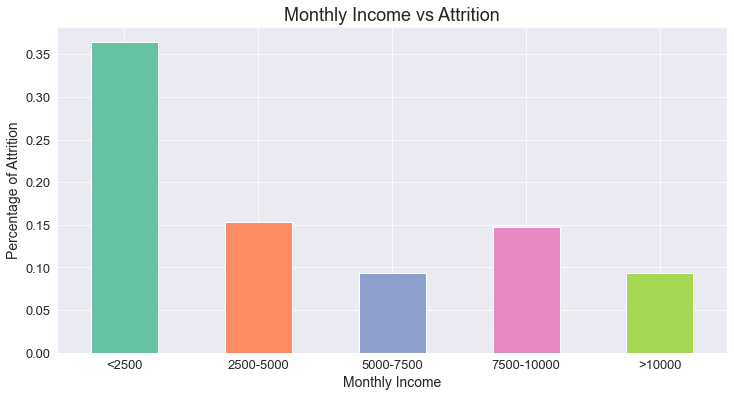

In [127]:
data.groupby(by='MonthlyIncome_cat')['Attrition'].mean().plot(kind='bar', color=sns.color_palette('Set2'), figsize=(12,6))
plt.title('Monthly Income vs Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [128]:
# There is high attrition among employees with low monthly income

In [131]:
# MonthlyRate vs Attrition

data['MonthlyRate'].describe()

count     1176.000000
mean     14441.028912
std       7162.742057
min       2094.000000
25%       8057.500000
50%      14379.500000
75%      20741.750000
max      26999.000000
Name: MonthlyRate, dtype: float64

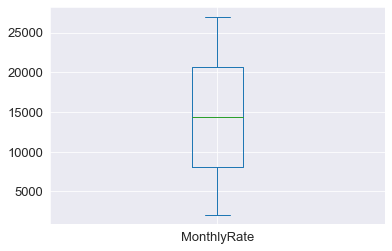

In [133]:
data['MonthlyRate'].plot(kind='box')
plt.show()

In [142]:
# MonthlyRate is a continuous variable, Let's categorize it for analysis purpose

data['MonthlyRate_cat'] = pd.cut(x=data['MonthlyRate'],
                                 bins=[0, 5000, 10000, 15000, 20000, 25000, np.inf],
                                 labels=['<5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '>25000'])

In [143]:
data.groupby(by='MonthlyRate_cat')['Attrition'].mean()

MonthlyRate_cat
<5000          0.170213
5000-10000     0.130252
10000-15000    0.179487
15000-20000    0.144681
20000-25000    0.164000
>25000         0.230769
Name: Attrition, dtype: float64

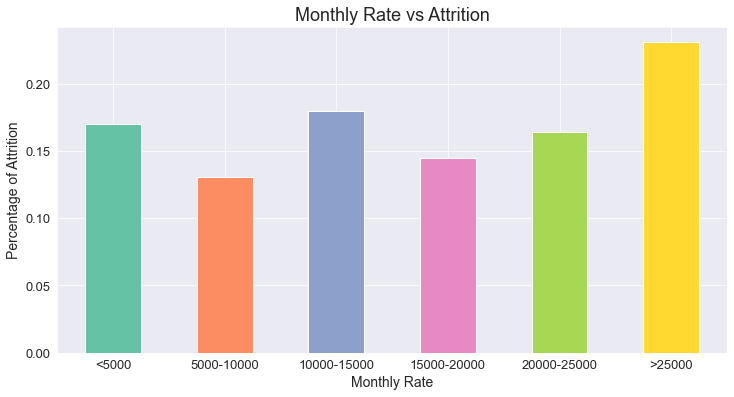

In [144]:
data.groupby(by='MonthlyRate_cat')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Monthly Rate vs Attrition')
plt.xlabel('Monthly Rate')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [145]:
# Employees with high monthly rate have high attrition rate but, no strong pattern found to generalize

In [147]:
# NumCompaniesWorked vs Attrition

data['NumCompaniesWorked'].value_counts()

1    431
0    158
3    125
4    115
2    108
7     60
5     52
6     47
9     41
8     39
Name: NumCompaniesWorked, dtype: int64

In [149]:
data.groupby(by='NumCompaniesWorked')['Attrition'].mean().sort_values(ascending=False)

NumCompaniesWorked
5    0.288462
7    0.283333
9    0.219512
6    0.212766
1    0.190255
4    0.139130
0    0.101266
3    0.096000
2    0.092593
8    0.076923
Name: Attrition, dtype: float64

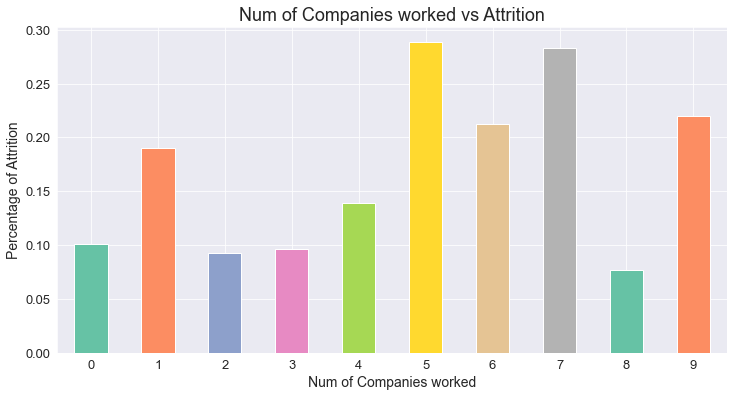

In [151]:
data.groupby(by='NumCompaniesWorked')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Num of Companies worked vs Attrition')
plt.xlabel('Num of Companies worked')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [152]:
# Not strong pattern found to generalize

In [153]:
# Over18 vs Attrition

data['Over18'].value_counts()

Y    1176
Name: Over18, dtype: int64

In [154]:
# All the employees are above 18 years of age. This variable should be dropped while data preparation as there is no variance

In [155]:
# OverTime vs Attrition

data['OverTime'].value_counts()

No     826
Yes    350
Name: OverTime, dtype: int64

In [156]:
data.groupby(by='OverTime')['Attrition'].mean()

OverTime
No     0.11138
Yes    0.28000
Name: Attrition, dtype: float64

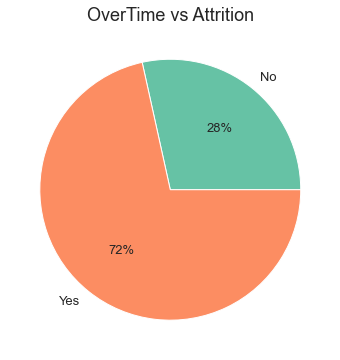

In [163]:
data.groupby(by='OverTime')['Attrition'].mean().plot(kind='pie', autopct='%.f%%', figsize=(12,6), colors=sns.color_palette('Set2'))
plt.ylabel(None)
plt.title('OverTime vs Attrition')
plt.show()

In [164]:
# Employees who work overtime have high attrition rate

In [165]:
# PercentSalaryHike vs Attrition

data['PercentSalaryHike'].value_counts()

13    174
14    161
11    161
12    159
15     91
18     73
17     62
19     60
16     54
20     47
22     44
21     38
23     19
24     17
25     16
Name: PercentSalaryHike, dtype: int64

In [166]:
data.groupby(by='PercentSalaryHike')['Attrition'].mean()

PercentSalaryHike
11    0.204969
12    0.194969
13    0.160920
14    0.099379
15    0.175824
16    0.166667
17    0.193548
18    0.150685
19    0.100000
20    0.127660
21    0.131579
22    0.181818
23    0.210526
24    0.235294
25    0.062500
Name: Attrition, dtype: float64

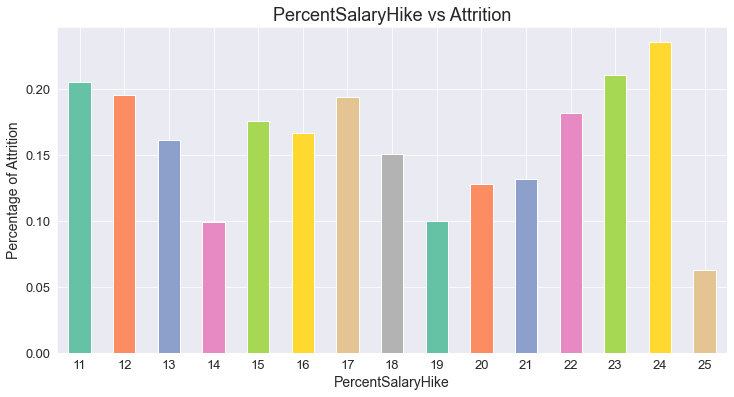

In [167]:
data.groupby(by='PercentSalaryHike')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('PercentSalaryHike vs Attrition')
plt.xlabel('PercentSalaryHike')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [172]:
# No strong pattern found to generalize

In [173]:
# Performance Rating vs Attrition

data['PerformanceRating'].value_counts()

3    995
4    181
Name: PerformanceRating, dtype: int64

In [175]:
data.groupby(by='PerformanceRating')['Attrition'].mean()

PerformanceRating
3    0.162814
4    0.154696
Name: Attrition, dtype: float64

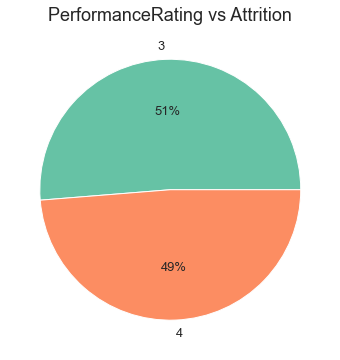

In [176]:
data.groupby(by='PerformanceRating')['Attrition'].mean().plot(kind='pie', autopct='%.f%%', figsize=(12,6), colors=sns.color_palette('Set2'))
plt.ylabel(None)
plt.title('PerformanceRating vs Attrition')
plt.show()

In [ ]:
# Performance rating of 3 has a 2% higher attrition rate when compared to performance rating of 4

In [177]:
# Relationship Satisfaction vs Attrition

data['RelationshipSatisfaction'].value_counts()

4    361
3    357
2    237
1    221
Name: RelationshipSatisfaction, dtype: int64

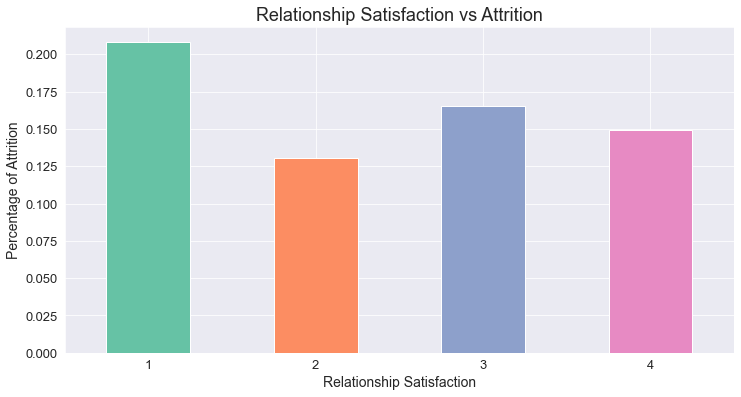

In [178]:
data.groupby(by='RelationshipSatisfaction')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Relationship Satisfaction vs Attrition')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [179]:
# Employees with very low relationship satisfaction have higher attrition rate

In [180]:
# Standard Hours vs Attrition

data['StandardHours'].value_counts()

80    1176
Name: StandardHours, dtype: int64

In [181]:
# All the employees have standard hours of 80. This variable should be dropped while data preparation as there is no variance

In [182]:
# StockOptionLevel vs Attrition

data['StockOptionLevel'].value_counts()

0    508
1    475
2    121
3     72
Name: StockOptionLevel, dtype: int64

In [183]:
data.groupby(by='StockOptionLevel')['Attrition'].mean()

StockOptionLevel
0    0.250000
1    0.084211
2    0.074380
3    0.194444
Name: Attrition, dtype: float64

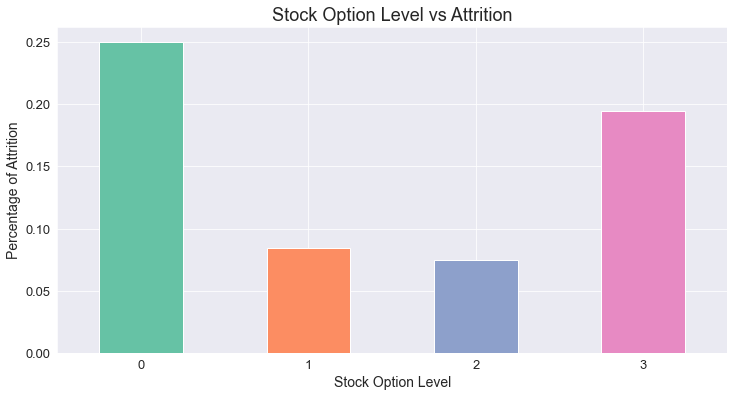

In [184]:
data.groupby(by='StockOptionLevel')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Stock Option Level vs Attrition')
plt.xlabel('Stock Option Level')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [185]:
# Employees with 0 stock option level have high attrition rate

In [187]:
# TotalWorkingYears vs Attrition

data['TotalWorkingYears'].describe()

count    1176.000000
mean       11.227041
std         7.860723
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

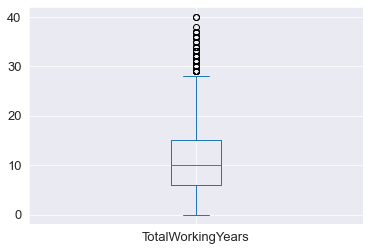

In [188]:
data['TotalWorkingYears'].plot(kind='box')
plt.show()

In [ ]:
# There are outliers in this variable that needs to be handled

In [190]:
# TotalWorkingYears is a continuous variable. Let's categorize this for analysis

data['TotalWorkingYears_cat'] = pd.cut(x=data['TotalWorkingYears'],
                                       bins=[0, 5, 10, 15, 20, 25, 30, np.inf],
                                       labels=['<5', '5 to 10', '10 to 15', '15 to 20', '20 to 25', '25 to 30', '>30'])

In [191]:
data.groupby(by='TotalWorkingYears_cat')['Attrition'].mean()

TotalWorkingYears_cat
<5          0.277778
5 to 10     0.147541
10 to 15    0.133803
15 to 20    0.090909
20 to 25    0.093023
25 to 30    0.027027
>30         0.097561
Name: Attrition, dtype: float64

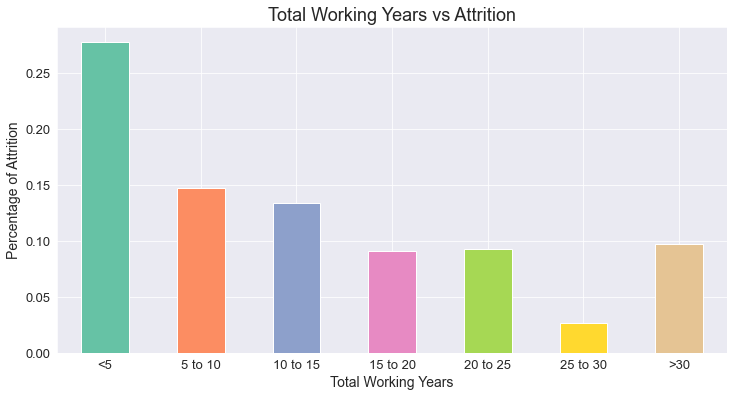

In [192]:
data.groupby(by='TotalWorkingYears_cat')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Total Working Years vs Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [193]:
# Employees with less than 5 years of experience have high attrition rate and higher the number of working years, lower is the
# attrition rate

In [194]:
# TrainingTimesLastYear vs Attrition

data['TrainingTimesLastYear'].value_counts()

2    435
3    400
4     96
5     94
1     56
6     52
0     43
Name: TrainingTimesLastYear, dtype: int64

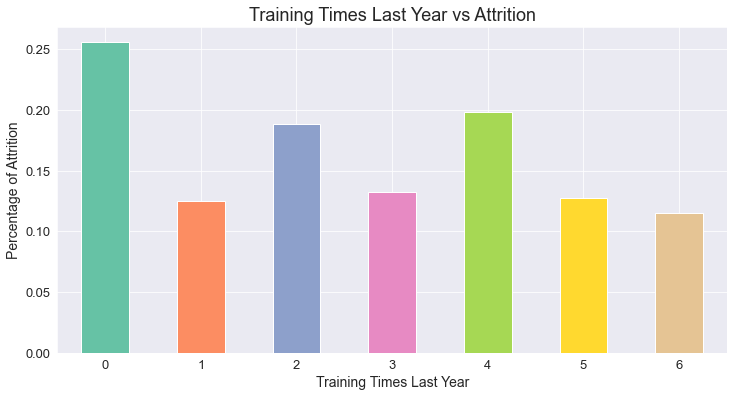

In [195]:
data.groupby(by='TrainingTimesLastYear')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Training Times Last Year vs Attrition')
plt.xlabel('Training Times Last Year')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
# Employees who did not undergo any trainings in the las year have high attrition rate

In [196]:
# WorkLifeBalance vs Attrition

data['WorkLifeBalance'].value_counts()

3    716
2    274
4    127
1     59
Name: WorkLifeBalance, dtype: int64

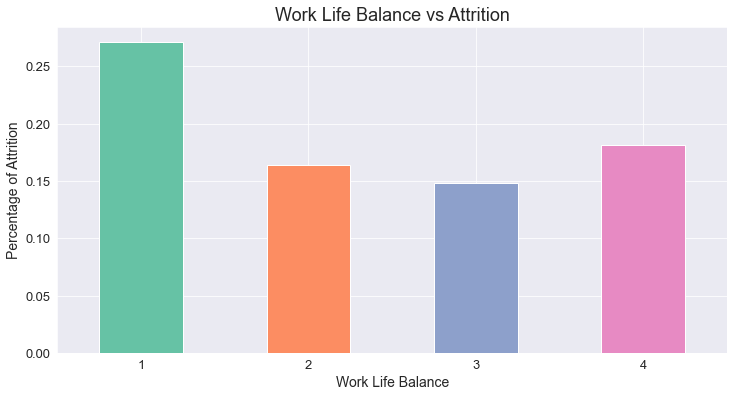

In [197]:
data.groupby(by='WorkLifeBalance')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Work Life Balance vs Attrition')
plt.xlabel('Work Life Balance')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [198]:
# Lower work life balance, Higher attrition

In [200]:
# YearsAtCompany vs Attrition

data['YearsAtCompany'].describe()

count    1176.000000
mean        7.038265
std         6.159806
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

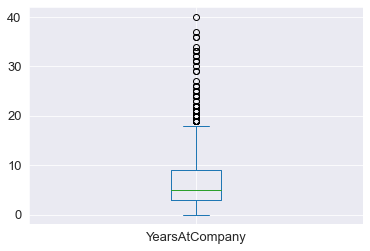

In [201]:
data['YearsAtCompany'].plot(kind='box')
plt.show()

In [202]:
# There are many outliers in this variable that needs to be handled

In [204]:
# Let's categorize this variable for analysis

data['YearsAtCompany_cat'] = pd.cut(x=data['YearsAtCompany'],
                                    bins=[0, 5, 10, 15, 20, np.inf],
                                    labels=['<5', '5 to 10', '10 to 15', '15 to 20', '>20'])

In [205]:
data.groupby(by='YearsAtCompany_cat')['Attrition'].mean()

YearsAtCompany_cat
<5          0.198618
5 to 10     0.121294
10 to 15    0.075000
15 to 20    0.070175
>20         0.111111
Name: Attrition, dtype: float64

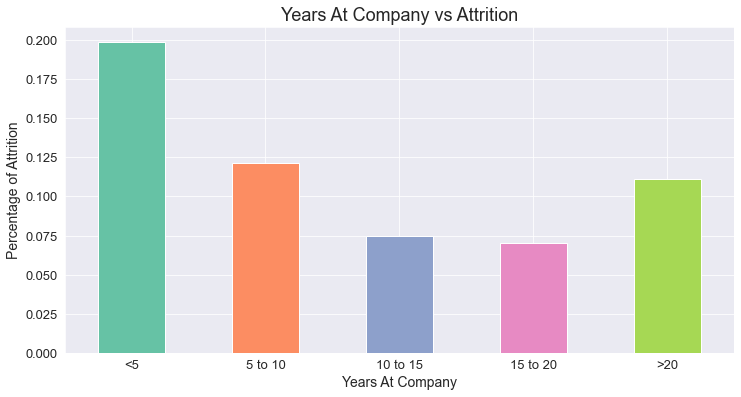

In [206]:
data.groupby(by='YearsAtCompany_cat')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Years At Company vs Attrition')
plt.xlabel('Years At Company')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [207]:
# Employees with less number of years in the company have high attrition rate

In [209]:
# YearsInCurrentRole vs Attrition

data['YearsInCurrentRole'].describe()

count    1176.000000
mean        4.246599
std         3.577053
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

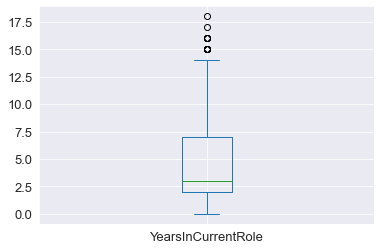

In [210]:
data['YearsInCurrentRole'].plot(kind='box')
plt.show()

In [211]:
# There are some outliers in this variable that needs to be handled

In [224]:
# Let's categorize this variable for analysis

data['YearsInCurrentRole_cat'] = pd.cut(x=data['YearsInCurrentRole'],
                                        bins=[-np.inf, 2, 4, 6, 8, np.inf],
                                        labels=['<2', '2 to 4', '4 to 6', '6 to 8', '>8'])

In [228]:
data.groupby(by='YearsInCurrentRole_cat')['Attrition'].mean()

YearsInCurrentRole_cat
<2        0.228302
2 to 4    0.114583
4 to 6    0.048387
6 to 8    0.128405
>8        0.081481
Name: Attrition, dtype: float64

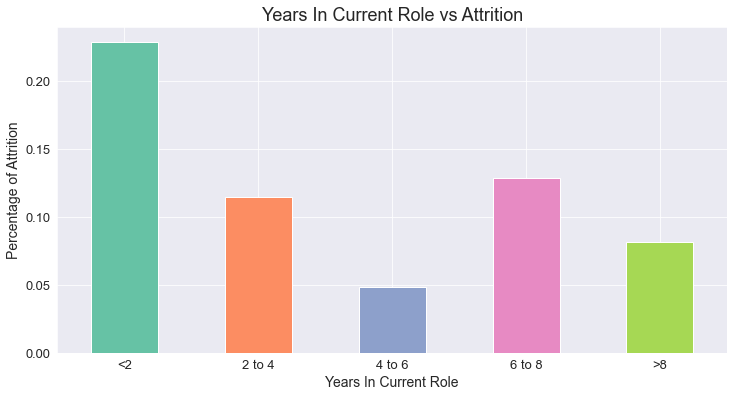

In [227]:
data.groupby(by='YearsInCurrentRole_cat')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Years In Current Role vs Attrition')
plt.xlabel('Years In Current Role')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [229]:
# YearsSinceLastPromotion vs Attrition

data['YearsSinceLastPromotion'].value_counts()

0     469
1     291
2     125
7      61
4      44
3      41
5      35
6      26
11     20
9      15
8      13
14      9
15      9
13      8
12      6
10      4
Name: YearsSinceLastPromotion, dtype: int64

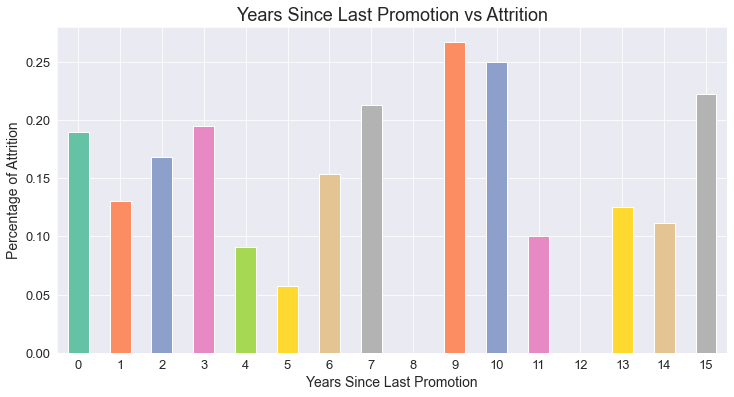

In [230]:
data.groupby(by='YearsSinceLastPromotion')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Years Since Last Promotion vs Attrition')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
# No generalizable pattern found

In [231]:
# YearsWithCurrManager vs Attrition

data['YearsWithCurrManager'].value_counts()

2     271
0     209
7     172
3     117
8      82
4      81
1      57
9      55
5      28
6      24
10     22
11     17
12     16
13     11
17      6
15      4
14      2
16      2
Name: YearsWithCurrManager, dtype: int64

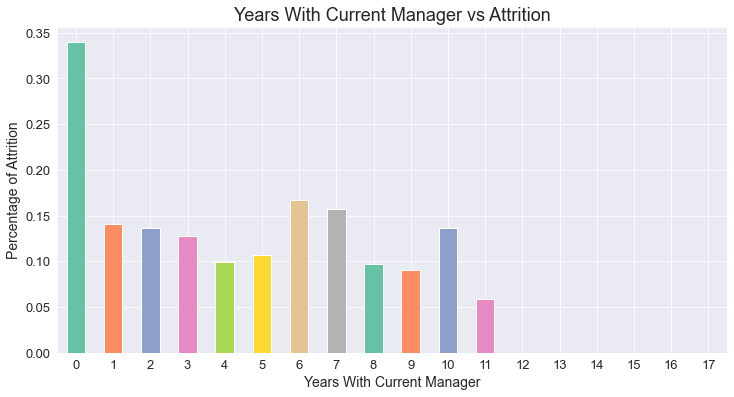

In [232]:
data.groupby(by='YearsWithCurrManager')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Years With Current Manager vs Attrition')
plt.xlabel('Years With Current Manager')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [233]:
# Higher the number of years with the same manager, Lower is the attrition rate

## 

#### Experimenting with Attribute Combinations

In [ ]:
# MonthlyRate vs Income
# Let's compute the difference between monthly rate i.e. the revenue that an employee generates for the company per month and
# the amount that is paid to that employee

In [234]:
data['MonthlyRatetoIncomeDiff'] = data['MonthlyRate'] - data['MonthlyIncome']

In [236]:
data['MonthlyRatetoIncomeDiff'].describe()

count     1176.000000
mean      7956.695578
std       8366.137571
min     -17377.000000
25%       1838.750000
50%       7983.000000
75%      14555.000000
max      25990.000000
Name: MonthlyRatetoIncomeDiff, dtype: float64

In [240]:
data['MonthlyRatetoIncomeDiff_cat'] = pd.cut(x=data['MonthlyRatetoIncomeDiff'],
                                             bins=[-np.inf, 0, 5000, 10000, 15000, 20000, np.inf],
                                             labels=['<0', '0k to 5k', '5k-10k', '10k-15k', '15k-20k', '>20k'])

In [241]:
data.groupby(by='MonthlyRatetoIncomeDiff_cat')['Attrition'].mean()

MonthlyRatetoIncomeDiff_cat
<0          0.061856
0k to 5k    0.190661
5k-10k      0.136929
10k-15k     0.182243
15k-20k     0.184783
>20k        0.267442
Name: Attrition, dtype: float64

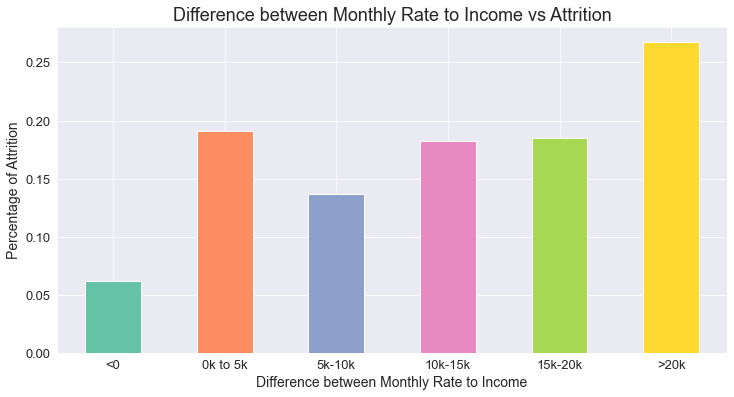

In [242]:
data.groupby(by='MonthlyRatetoIncomeDiff_cat')['Attrition'].mean().plot(kind='bar', figsize=(12,6), color=sns.color_palette('Set2'))
plt.title('Difference between Monthly Rate to Income vs Attrition')
plt.xlabel('Difference between Monthly Rate to Income')
plt.ylabel('Percentage of Attrition')
plt.xticks(rotation='horizontal')
plt.show()

In [243]:
# Employees who generate more revenue and get lower monthly income have high attrition rate

## 

#### Correlations

In [244]:
# Let's look at the correlation matrix

corr_matrix = data.corr()

In [245]:
corr_matrix

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.170125   0.015191          0.007701   
Attrition                -0.170125   1.000000  -0.068627          0.081320   
DailyRate                 0.015191  -0.068627   1.000000         -0.002936   
DistanceFromHome          0.007701   0.081320  -0.002936          1.000000   
Education                 0.197048  -0.021930  -0.023662          0.024059   
EmployeeCount                  NaN        NaN        NaN               NaN   
EmployeeNumber           -0.001066  -0.005618  -0.032650          0.011799   
EnvironmentSatisfaction   0.012521  -0.102922   0.019753         -0.017846   
HourlyRate                0.017854  -0.008379   0.029826          0.025495   
JobInvolvement            0.037652  -0.138244   0.054095         -0.004465   
JobLevel                  0.514340  -0.161484   0.001366          0.023097   
JobSatisfaction          -0.022929  -0.124520   0.022135         -0.015950   
MonthlyIncome             0.502926  -0.155148   0.002965         -0.002797   
MonthlyRate               0.025631   0.025508  -0.035378          0.044534   
NumCompaniesWorked        0.299641   0.052129   0.025749          0.003105   
PercentSalaryHike         0.024939  -0.033125   0.017997          0.028594   
PerformanceRating         0.010834  -0.007959   0.003465          0.032947   
RelationshipSatisfaction  0.059774  -0.037369  -0.001239          0.014944   
StandardHours                  NaN        NaN        NaN               NaN   
StockOptionLevel          0.044867  -0.136547   0.053351          0.057794   
TotalWorkingYears         0.688404  -0.176171   0.013502          0.014204   
TrainingTimesLastYear    -0.026277  -0.053751   0.006230         -0.052193   
WorkLifeBalance          -0.032289  -0.036884  -0.029890         -0.001146   
YearsAtCompany            0.319376  -0.138563  -0.039245          0.017229   
YearsInCurrentRole        0.221520  -0.156278  -0.003251          0.027870   
YearsSinceLastPromotion   0.215349  -0.028410  -0.047555         -0.003088   
YearsWithCurrManager      0.216671  -0.162790  -0.020648          0.020973   
MonthlyRatetoIncomeDiff  -0.261955   0.109420  -0.031963          0.039707   

                          Education  EmployeeCount  EmployeeNumber  \
Age                        0.197048            NaN       -0.001066   
Attrition                 -0.021930            NaN       -0.005618   
DailyRate                 -0.023662            NaN       -0.032650   
DistanceFromHome           0.024059            NaN        0.011799   
Education                  1.000000            NaN        0.051359   
EmployeeCount                   NaN            NaN             NaN   
EmployeeNumber             0.051359            NaN        1.000000   
EnvironmentSatisfaction   -0.004105            NaN        0.045929   
HourlyRate                 0.009995            NaN        0.039046   
JobInvolvement             0.040697            NaN       -0.012788   
JobLevel                   0.103966            NaN       -0.030088   
JobSatisfaction           -0.017812            NaN       -0.065598   
MonthlyIncome              0.094953            NaN       -0.016673   
MonthlyRate               -0.034569            NaN        0.002427   
NumCompaniesWorked         0.120413            NaN       -0.000961   
PercentSalaryHike         -0.043065            NaN       -0.003813   
PerformanceRating         -0.044979            NaN       -0.008692   
RelationshipSatisfaction   0.005390            NaN       -0.066073   
StandardHours                   NaN            NaN             NaN   
StockOptionLevel           0.014414            NaN        0.053809   
TotalWorkingYears          0.143660            NaN       -0.017583   
TrainingTimesLastYear     -0.039789            NaN        0.010886   
WorkLifeBalance            0.008171            NaN       -0.005120   
YearsAtCompany             0.065068            NaN       -0.026576   
YearsInCurrentRole

In [246]:
corr_matrix['Attrition']

Age                        -0.170125
Attrition                   1.000000
DailyRate                  -0.068627
DistanceFromHome            0.081320
Education                  -0.021930
EmployeeCount                    NaN
EmployeeNumber             -0.005618
EnvironmentSatisfaction    -0.102922
HourlyRate                 -0.008379
JobInvolvement             -0.138244
JobLevel                   -0.161484
JobSatisfaction            -0.124520
MonthlyIncome              -0.155148
MonthlyRate                 0.025508
NumCompaniesWorked          0.052129
PercentSalaryHike          -0.033125
PerformanceRating          -0.007959
RelationshipSatisfaction   -0.037369
StandardHours                    NaN
StockOptionLevel           -0.136547
TotalWorkingYears          -0.176171
TrainingTimesLastYear      -0.053751
WorkLifeBalance            -0.036884
YearsAtCompany             -0.138563
YearsInCurrentRole         -0.156278
YearsSinceLastPromotion    -0.028410
YearsWithCurrManager       -0.162790
M

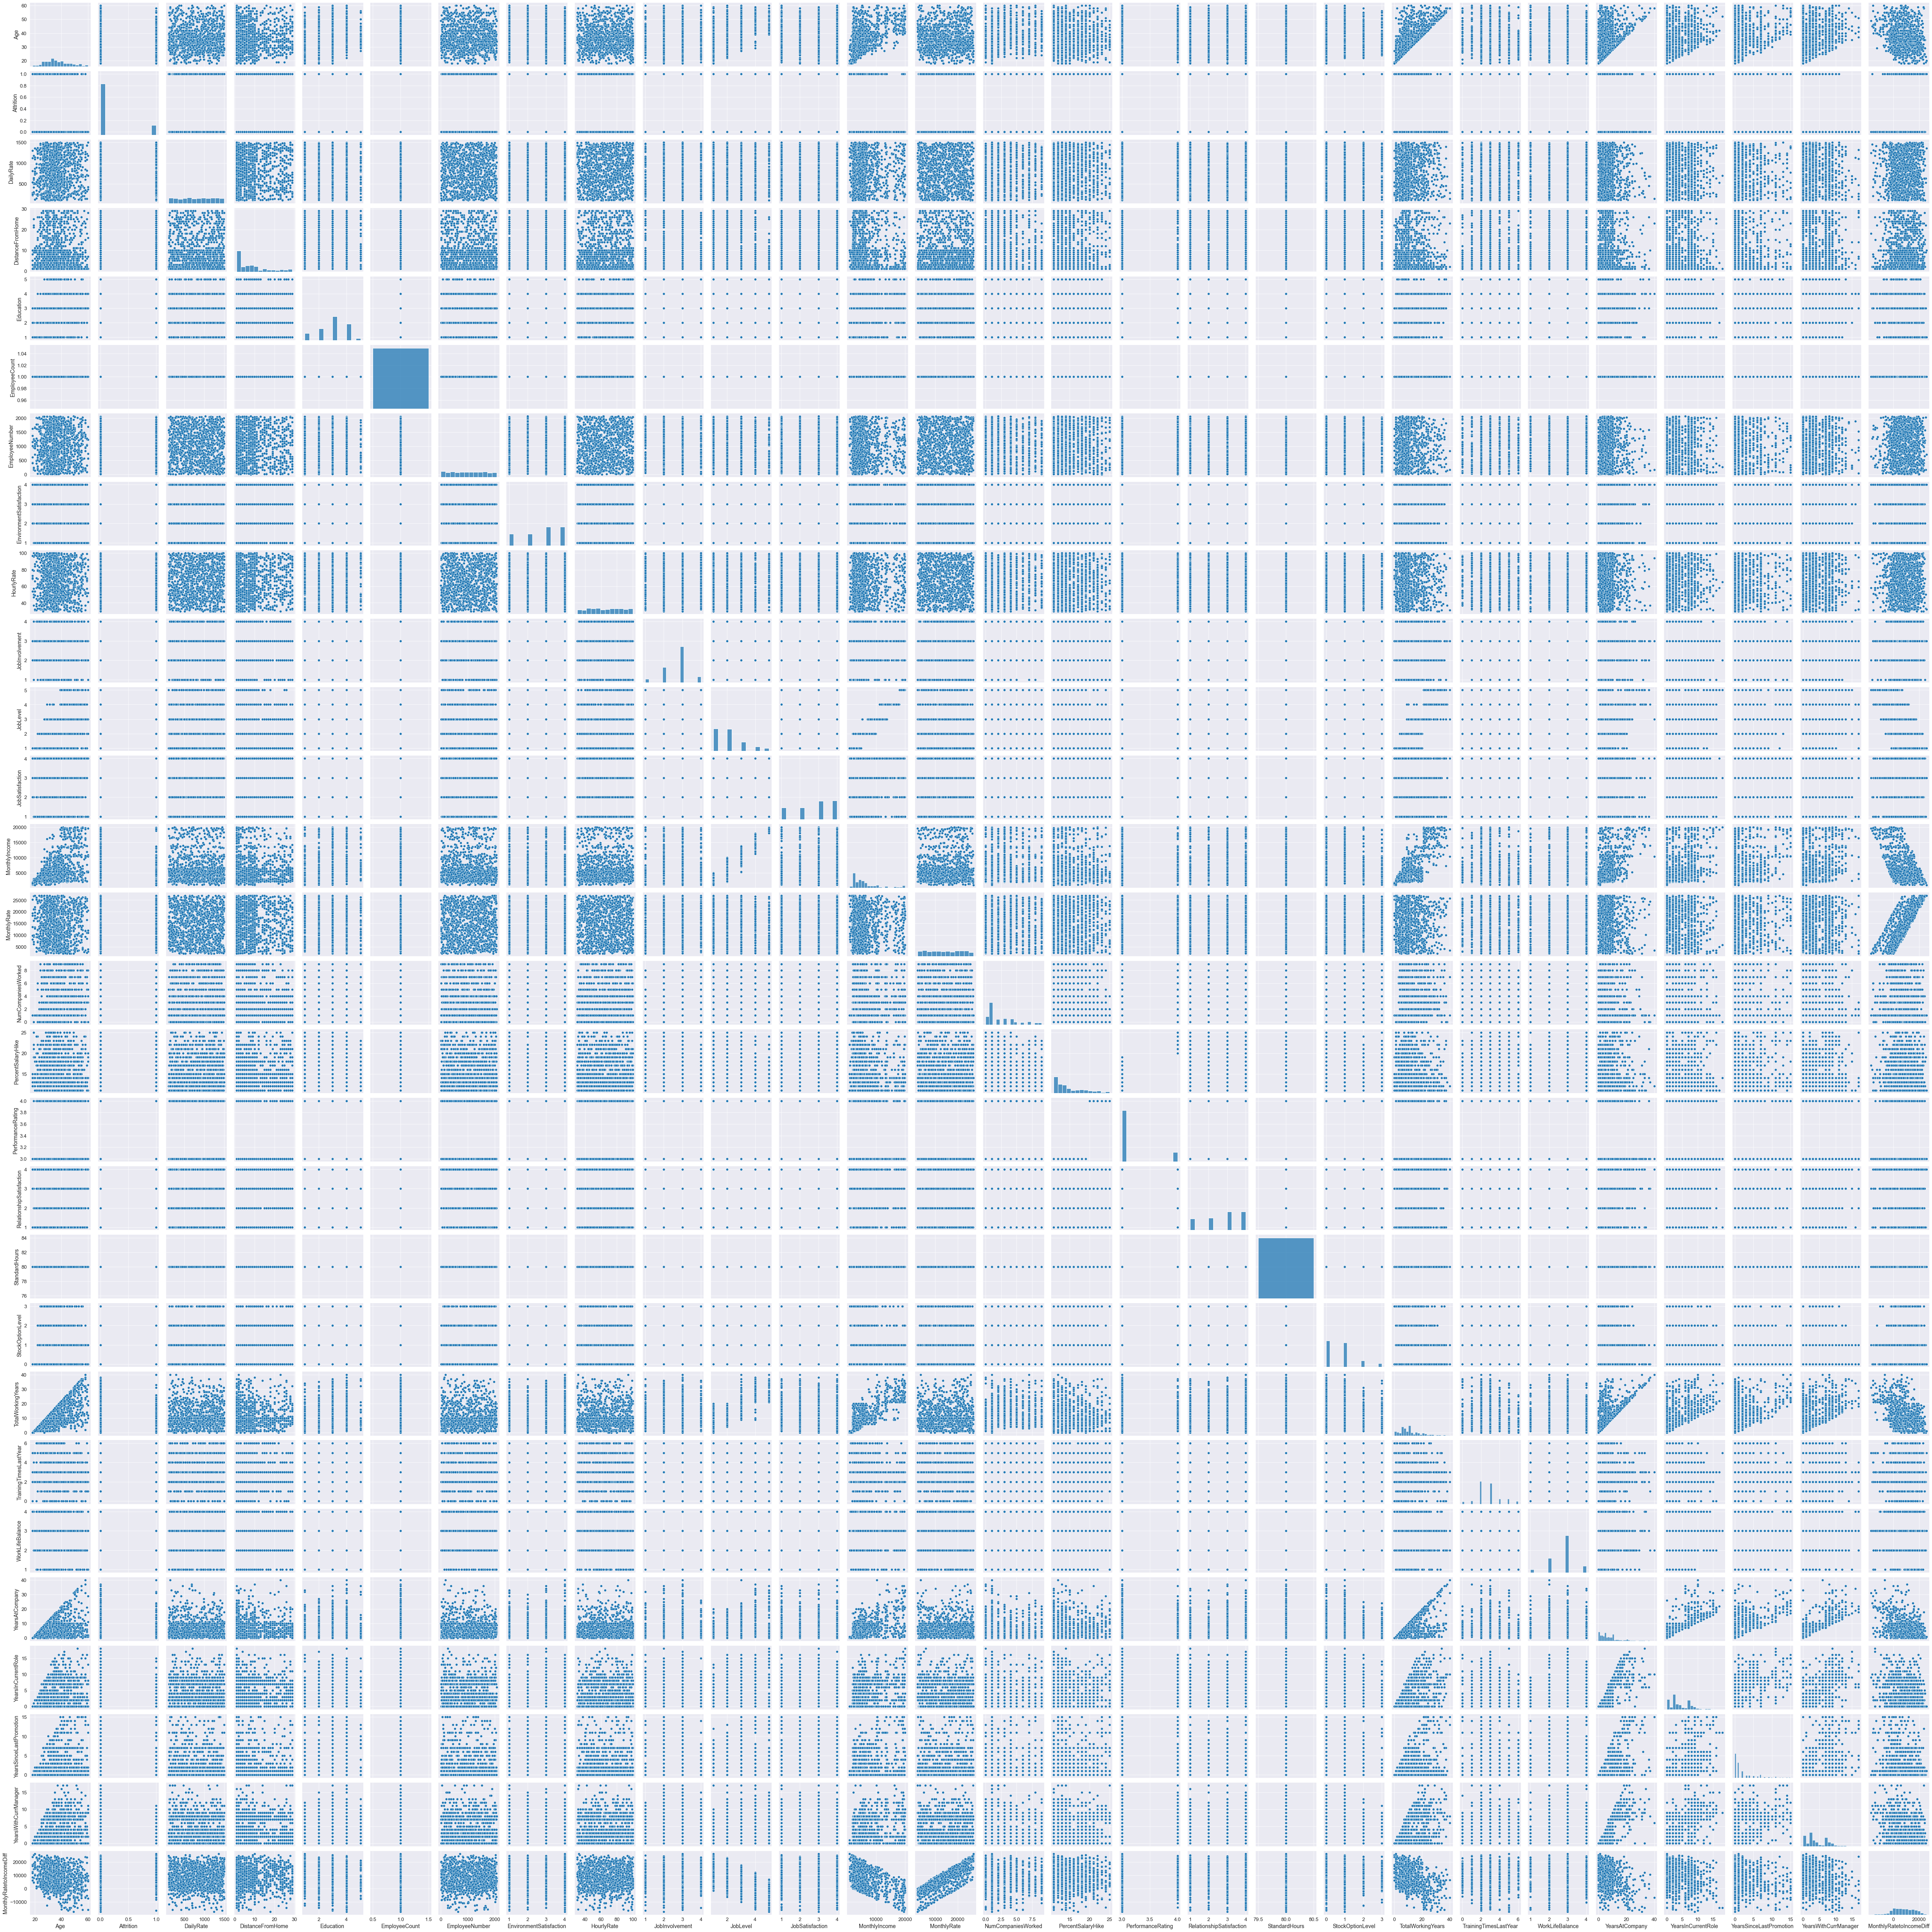

In [249]:
sns.pairplot(data=data)
plt.show()

In [253]:
# Saving the dataframes

df_train.to_csv('./df_train.csv', header=True, index_label='index')
df_test.to_csv('./df_test.csv', header=True, index_label='index')
data.to_csv('./data.csv', header=True, index_label='index')